In [34]:
import math, sys, os, numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from ipywidgets import interact, fixed, interactive
from __future__ import print_function, division
from ipywidgets.widgets import *

rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [35]:
def lin(a, b, x): return a * x + b

In [36]:
a = 3
b = 8
n = 30

x = random(n)
y = lin(a, b, x)

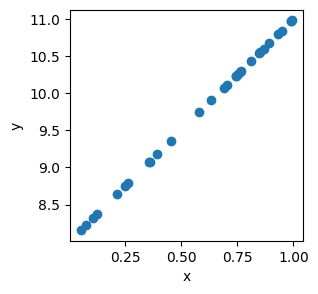

In [37]:
plt.scatter(x, y);
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [38]:
def sse(y, y_pred): return ((y-y_pred)**2).sum()
def loss(y, a, b, x): return sse(y, lin(a, b, x))
def avg_loss(y, a, b, x): return np.sqrt(loss(y, a, b, x)/n)


In [55]:
a_guess = -1
b_guess = -1
avg_loss(y, a_guess, b_guess, x)

11.484242136075148

In [56]:
lr = 0.01

def upd():
  global a_guess, b_guess
  y_pred = lin(a_guess, b_guess, x)
  dydb = 2 * (y_pred-y)
  dyda = x * dydb
  a_guess -= lr*dyda.mean()
  b_guess -= lr*dydb.mean()

In [57]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x, y)
line, = plt.plot(x, lin(a_guess, b_guess, x))
plt.close()

def animate(i):
  line.set_ydata(lin(a_guess, b_guess, x))
  for i in range(10):
    upd()
  return line

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=200)
ani

In [4]:
import numpy as np, math
from numpy.random import normal, uniform, randint
from numpy import uint8 as u8, newaxis
from numpy.linalg import norm
from __future__ import print_function, division
np.random.seed(0)

In [5]:
n_input = 2; n_hidden = 15; n_out = 1; digits = 8

In [6]:
inp_i = randint(0, 127,  size=(10000, n_input), dtype=u8)
out_i = np.sum(inp_i, n_out).astype(u8)
out_i[:10]

array([ 54,  59, 110, 140,  60, 119, 109, 155, 129, 149], dtype=uint8)

In [7]:
def to_bin(nums):
  rank = len(nums.shape)
  return np.unpackbits(np.expand_dims(nums, rank), rank)

In [8]:
to_bin(np.array([105, 3], dtype=u8))

array([[0, 1, 1, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1]], dtype=uint8)

In [9]:
inp = to_bin(inp_i)[:, :, ::-1]
inp[:3]

array([[[0, 0, 1, 1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0]],

       [[0, 0, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 1, 0, 0]],

       [[0, 1, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0]]], dtype=uint8)

In [10]:
outp = to_bin(out_i)[:, ::-1]
outp[:3]

array([[0, 1, 1, 0, 1, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 0]], dtype=uint8)

In [30]:
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Activation, Input, SimpleRNN, LSTM, GRU, TimeDistributed
from keras import backend as k, initializers

In [17]:
X = inp.transpose(0, 2, 1).astype(np.float32)
Y = outp[:,:,newaxis].astype(np.float32)
X.shape, Y.shape

((10000, 8, 2), (10000, 8, 1))

In [18]:
outp.shape

(10000, 8)

In [48]:
model = Sequential([
    SimpleRNN(input_shape=(digits, n_input), units=n_hidden,
              activation='sigmoid', return_sequences=True, kernel_initializer='random_normal'),
    TimeDistributed(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_11 (SimpleRNN)            │ (None, 8, 15)               │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_4 (TimeDistributed) │ (None, 8, 1)                │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 286 (1.12 KB)

 Trainable params: 286 (1.12 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
sgd = SGD(learning_rate=0.3, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

In [50]:
model.fit(X, Y, epochs=10, batch_size=32);

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5010 - loss: 0.2505
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5016 - loss: 0.2505
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5030 - loss: 0.2507
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5097 - loss: 0.2501
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5317 - loss: 0.2467
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7455 - loss: 0.1950
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9249 - loss: 0.0828
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9356 - loss: 0.0547
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0120
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0043


In [61]:
np.round(model.predict(X[0:1])[0]).T

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[0., 1., 1., 0., 1., 1., 0., 0.]], dtype=float32)

In [75]:
Y[0:1][0].T

array([[0., 1., 1., 0., 1., 1., 0., 0.]], dtype=float32)

In [76]:
np.allclose(np.round(model.predict(X[0:1])[0]).T, Y[0:1][0].T)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


True